# Apoorva Goswami- ag94891@usc.edu Data Science Assignment

## Imported Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from mord import OrdinalRidge
from mord import LogisticIT
from mord import LogisticAT
from mord import OrdinalRidge
from mord import LAD
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from tabulate import tabulate
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

## Loaded the data into a dataframe

In [2]:
df = pd.read_csv('/Users/apoorvagoswami/Downloads/starcraft_player_data.csv')

## Data Description

In [3]:
df.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [4]:
# Displaying the first few rows of the dataset
print(df.head())

   GameID  LeagueIndex Age HoursPerWeek TotalHours       APM  SelectByHotkeys  \
0      52            5  27           10       3000  143.7180         0.003515   
1      55            5  23           10       5000  129.2322         0.003304   
2      56            4  30           10        200   69.9612         0.001101   
3      57            3  19           20        400  107.6016         0.001034   
4      58            3  32           10        500  122.8908         0.001136   

   AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0         0.000220              7        0.000110            0.000392   
1         0.000259              4        0.000294            0.000432   
2         0.000336              4        0.000294            0.000461   
3         0.000213              1        0.000053            0.000543   
4         0.000327              2        0.000000            0.001329   

   NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0      0.0

In [5]:
# Checking the dimensions of the dataset
print(df.shape)

(3395, 20)


In [6]:
# Checking the data types of the variables
print(df.dtypes)

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object


#### Age, Hours Per Week and Total Hours features has data type object

## Data Preprocessing

### Number of Missing data for each Feature

In [7]:
def count_question_marks(dataframe):
    for column in dataframe.columns:
        question_mark_count = dataframe[column].astype(str).str.count('\?').sum()
        print(f"'{column}': {question_mark_count}")
count_question_marks(df)

'GameID': 0
'LeagueIndex': 0
'Age': 55
'HoursPerWeek': 56
'TotalHours': 57
'APM': 0
'SelectByHotkeys': 0
'AssignToHotkeys': 0
'UniqueHotkeys': 0
'MinimapAttacks': 0
'MinimapRightClicks': 0
'NumberOfPACs': 0
'GapBetweenPACs': 0
'ActionLatency': 0
'ActionsInPAC': 0
'TotalMapExplored': 0
'WorkersMade': 0
'UniqueUnitsMade': 0
'ComplexUnitsMade': 0
'ComplexAbilitiesUsed': 0


### Interpretation:-

#### Among all the features Age, Hours per Week and Total Hours have missing values denoted by '?' Mark  

### Data Preprocessing

In [8]:
## Replaced the missing values from Question Mark to NAN and object data type to Float64 for better computation 

df.replace('?', np.nan, inplace=True)
df['Age'] = df['Age'].astype('float64')
df['HoursPerWeek'] = df['HoursPerWeek'].astype('float64')
df['TotalHours'] = df['TotalHours'].astype('float64')

# EDA

### Showing  that Age, Hours per Week and Total Hours are the features which have missing data almost all contribute to rank 8 that is Professional Leagues

In [9]:
def print_unique_rank_with_missing_data(df, feature):
    # Filter rows where the feature is missing
    filtered_df = df[df[feature].isnull()]

    # Get unique ranks
    unique_ranks = filtered_df["LeagueIndex"].unique()

    # Print unique ranks
    print(f"Unique ranks where {feature} is missing:")
    for rank in unique_ranks:
        rank_count = filtered_df[filtered_df["LeagueIndex"] == rank].shape[0]
        print(f"Rank {rank}: Count = {rank_count}")

# Call the function for each feature
print_unique_rank_with_missing_data(df, "Age")
print()
print_unique_rank_with_missing_data(df, "HoursPerWeek")
print()
print_unique_rank_with_missing_data(df, "TotalHours")

Unique ranks where Age is missing:
Rank 8: Count = 55

Unique ranks where HoursPerWeek is missing:
Rank 5: Count = 1
Rank 8: Count = 55

Unique ranks where TotalHours is missing:
Rank 5: Count = 2
Rank 8: Count = 55


### Interpretation:-

#### We do not have any data about Age, HourPerWeek and TotalHours for Rank 8 (Professional League) Player
#### We have to fiil this data with median statistics to interpret about Rank 8 we can not simply drop these rows

In [10]:
# Checking summary statistics of numerical variables
print(df.describe())

             GameID  LeagueIndex          Age  HoursPerWeek      TotalHours  \
count   3395.000000  3395.000000  3340.000000   3339.000000     3338.000000   
mean    4805.012371     4.184094    21.647904     15.910752      960.421809   
std     2719.944851     1.517327     4.206341     11.962912    17318.133922   
min       52.000000     1.000000    16.000000      0.000000        3.000000   
25%     2464.500000     3.000000    19.000000      8.000000      300.000000   
50%     4874.000000     4.000000    21.000000     12.000000      500.000000   
75%     7108.500000     5.000000    24.000000     20.000000      800.000000   
max    10095.000000     8.000000    44.000000    168.000000  1000000.000000   

               APM  SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  \
count  3395.000000      3395.000000      3395.000000    3395.000000   
mean    117.046947         0.004299         0.000374       4.364654   
std      51.945291         0.005284         0.000225       2.360333   
min 

### Interpretation:-

#### HoursPerWeek, TotalHours, APM and GapBetweenPACs have heavy Outliers the Range is very large 
#### We have to preform standardation scaling before buliding the model 

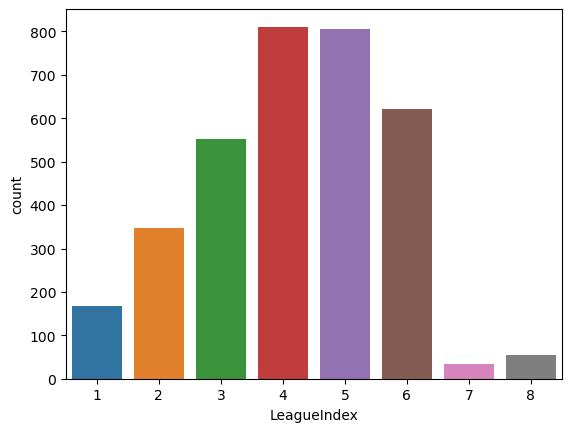

In [11]:
# Checking the distribution of the target variable
sns.countplot(x='LeagueIndex', data=df)
plt.show()

### Interpretation:- 

#### we can see that the distribution of Rank is skewed and Maximum players have Rank 4 or Rank 5 that is Platinum or Diamond
#### There are very less players with Rank 7 and 8 that is Grand Master and Professional 
### Major take away we do not have equal and of compariable data for all class/Rank which will impact over prediction we should enough data of every class which will help us to train over model better

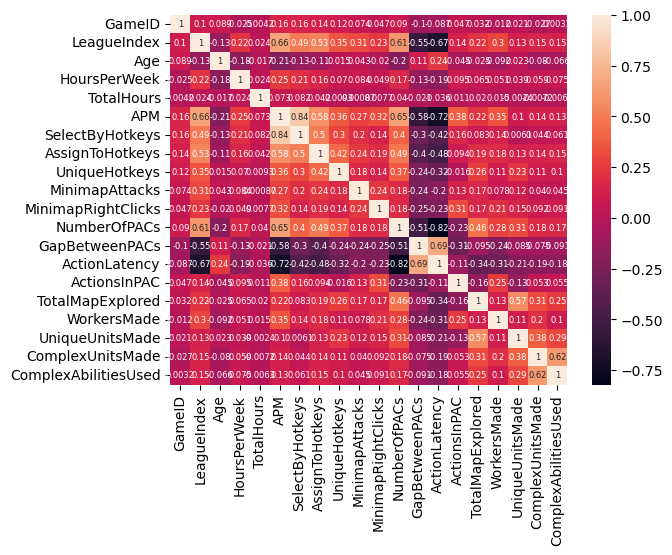

<Figure size 100000x100000 with 0 Axes>

In [12]:
# Checking the correlation between variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 6})
plt.figure(figsize=(1000, 1000))
plt.show()

### Interpretation

#### We can clearly see that SelectByHotKeys and APM are highly positively correlated
#### Similarly ActionLatency and GapBetweenPACs are also strongly correlated 
#### Based on the above correlation matrix, we can observe that some features have a high correlation with each other, which implies that these features provide redundant information to the model. In such cases, domain knowledge and expertise can be used to determine which of the highly correlated features to remove. Removing redundant features can simplify the model and improve its interpretability, as well as reduce the risk of overfitting

In [13]:
age_copy = df['Age'].copy()
age_copy.replace('?', np.nan, inplace=True)
age_copy = pd.to_numeric(age_copy, errors='coerce')
# Count the occurrences of each age and sort by index
age_counts = age_copy.value_counts().to_frame().sort_index()

<AxesSubplot:>

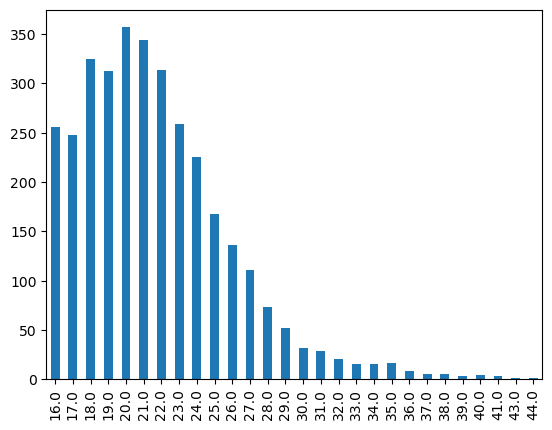

In [14]:
age_counts['Age'].plot(kind='bar')

### Interpretation

#### We can see that the distribution of Age is skewed, and the main age group which play Starcraft are from 19 to 25 and the count started decreasing after that 
#### As the data is skewed thats why median will be good statistics to fill the missing values

In [15]:
HoursPerWeek_copy = df['HoursPerWeek'].copy()
HoursPerWeek_copy.replace('?', np.nan, inplace=True)

# Compute value counts of 'HoursPerWeek'
value_counts2 = HoursPerWeek_copy.value_counts().to_frame()

# Convert index to numeric, ignoring NaN values
value_counts2.index = pd.to_numeric(value_counts2.index, errors='coerce')


In [16]:
value_counts2.head()

,HoursPerWeek
10.0,411
8.0,390
20.0,335
12.0,331
6.0,323


In [17]:
value_counts2.tail()

,HoursPerWeek
112.0,1
90.0,1
98.0,1
140.0,1
80.0,1


### Interpretation

#### We can see Numbers of Hours Per week generally player play is 6 to 20, 6 hrs 8 hrs 10 hrs 12 hrs and 20 hours 
#### The Number goes to 140 but very less play that many high hours

{'whiskers': [<matplotlib.lines.Line2D at 0x14b59f220>,
 'caps': [<matplotlib.lines.Line2D at 0x14b59f7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14b5cff10>],
 'medians': [<matplotlib.lines.Line2D at 0x14b59fd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c0fa070>],
 'means': []}

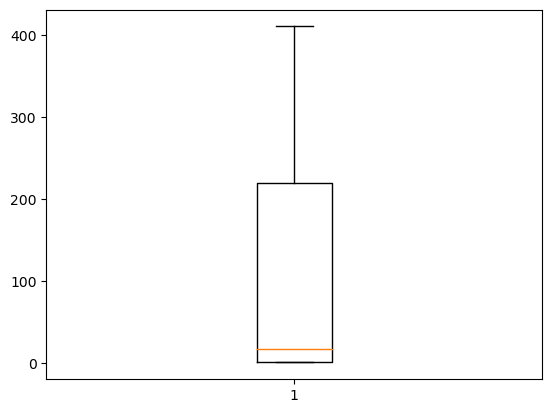

In [18]:
fig, ax = plt.subplots()
ax.boxplot(value_counts2)

### Hours Per Week  and Total Hours have outliers so we will use maidian to fill missing values for them 

# Showed all features w.r.t Rank 

## The Plots below show the average amount of feature by Rank 

In [19]:
def plot_average_by_rank(data, x_column, y_columns, titles):
    num_plots = len(y_columns)
    num_rows = num_plots // 3
    if num_plots % 3 != 0:
        num_rows += 1
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 4*num_rows))
    axes = axes.flatten()
    
    for i, y_column in enumerate(y_columns):
        grouped_data = data.groupby(x_column)[y_column].mean()

        axes[i].plot(grouped_data.index, grouped_data.values, marker='o')

        for x_value, y_value in zip(grouped_data.index, grouped_data.values):
            axes[i].text(x_value, y_value, str(round(y_value, 2)), ha='center', va='bottom')

        axes[i].set_xlabel(x_column)
        axes[i].set_ylabel(y_column)
        axes[i].set_title(titles[i])
    
    plt.tight_layout()
    plt.show()

In [20]:
feature_names_plt = df.columns.tolist()[2:]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


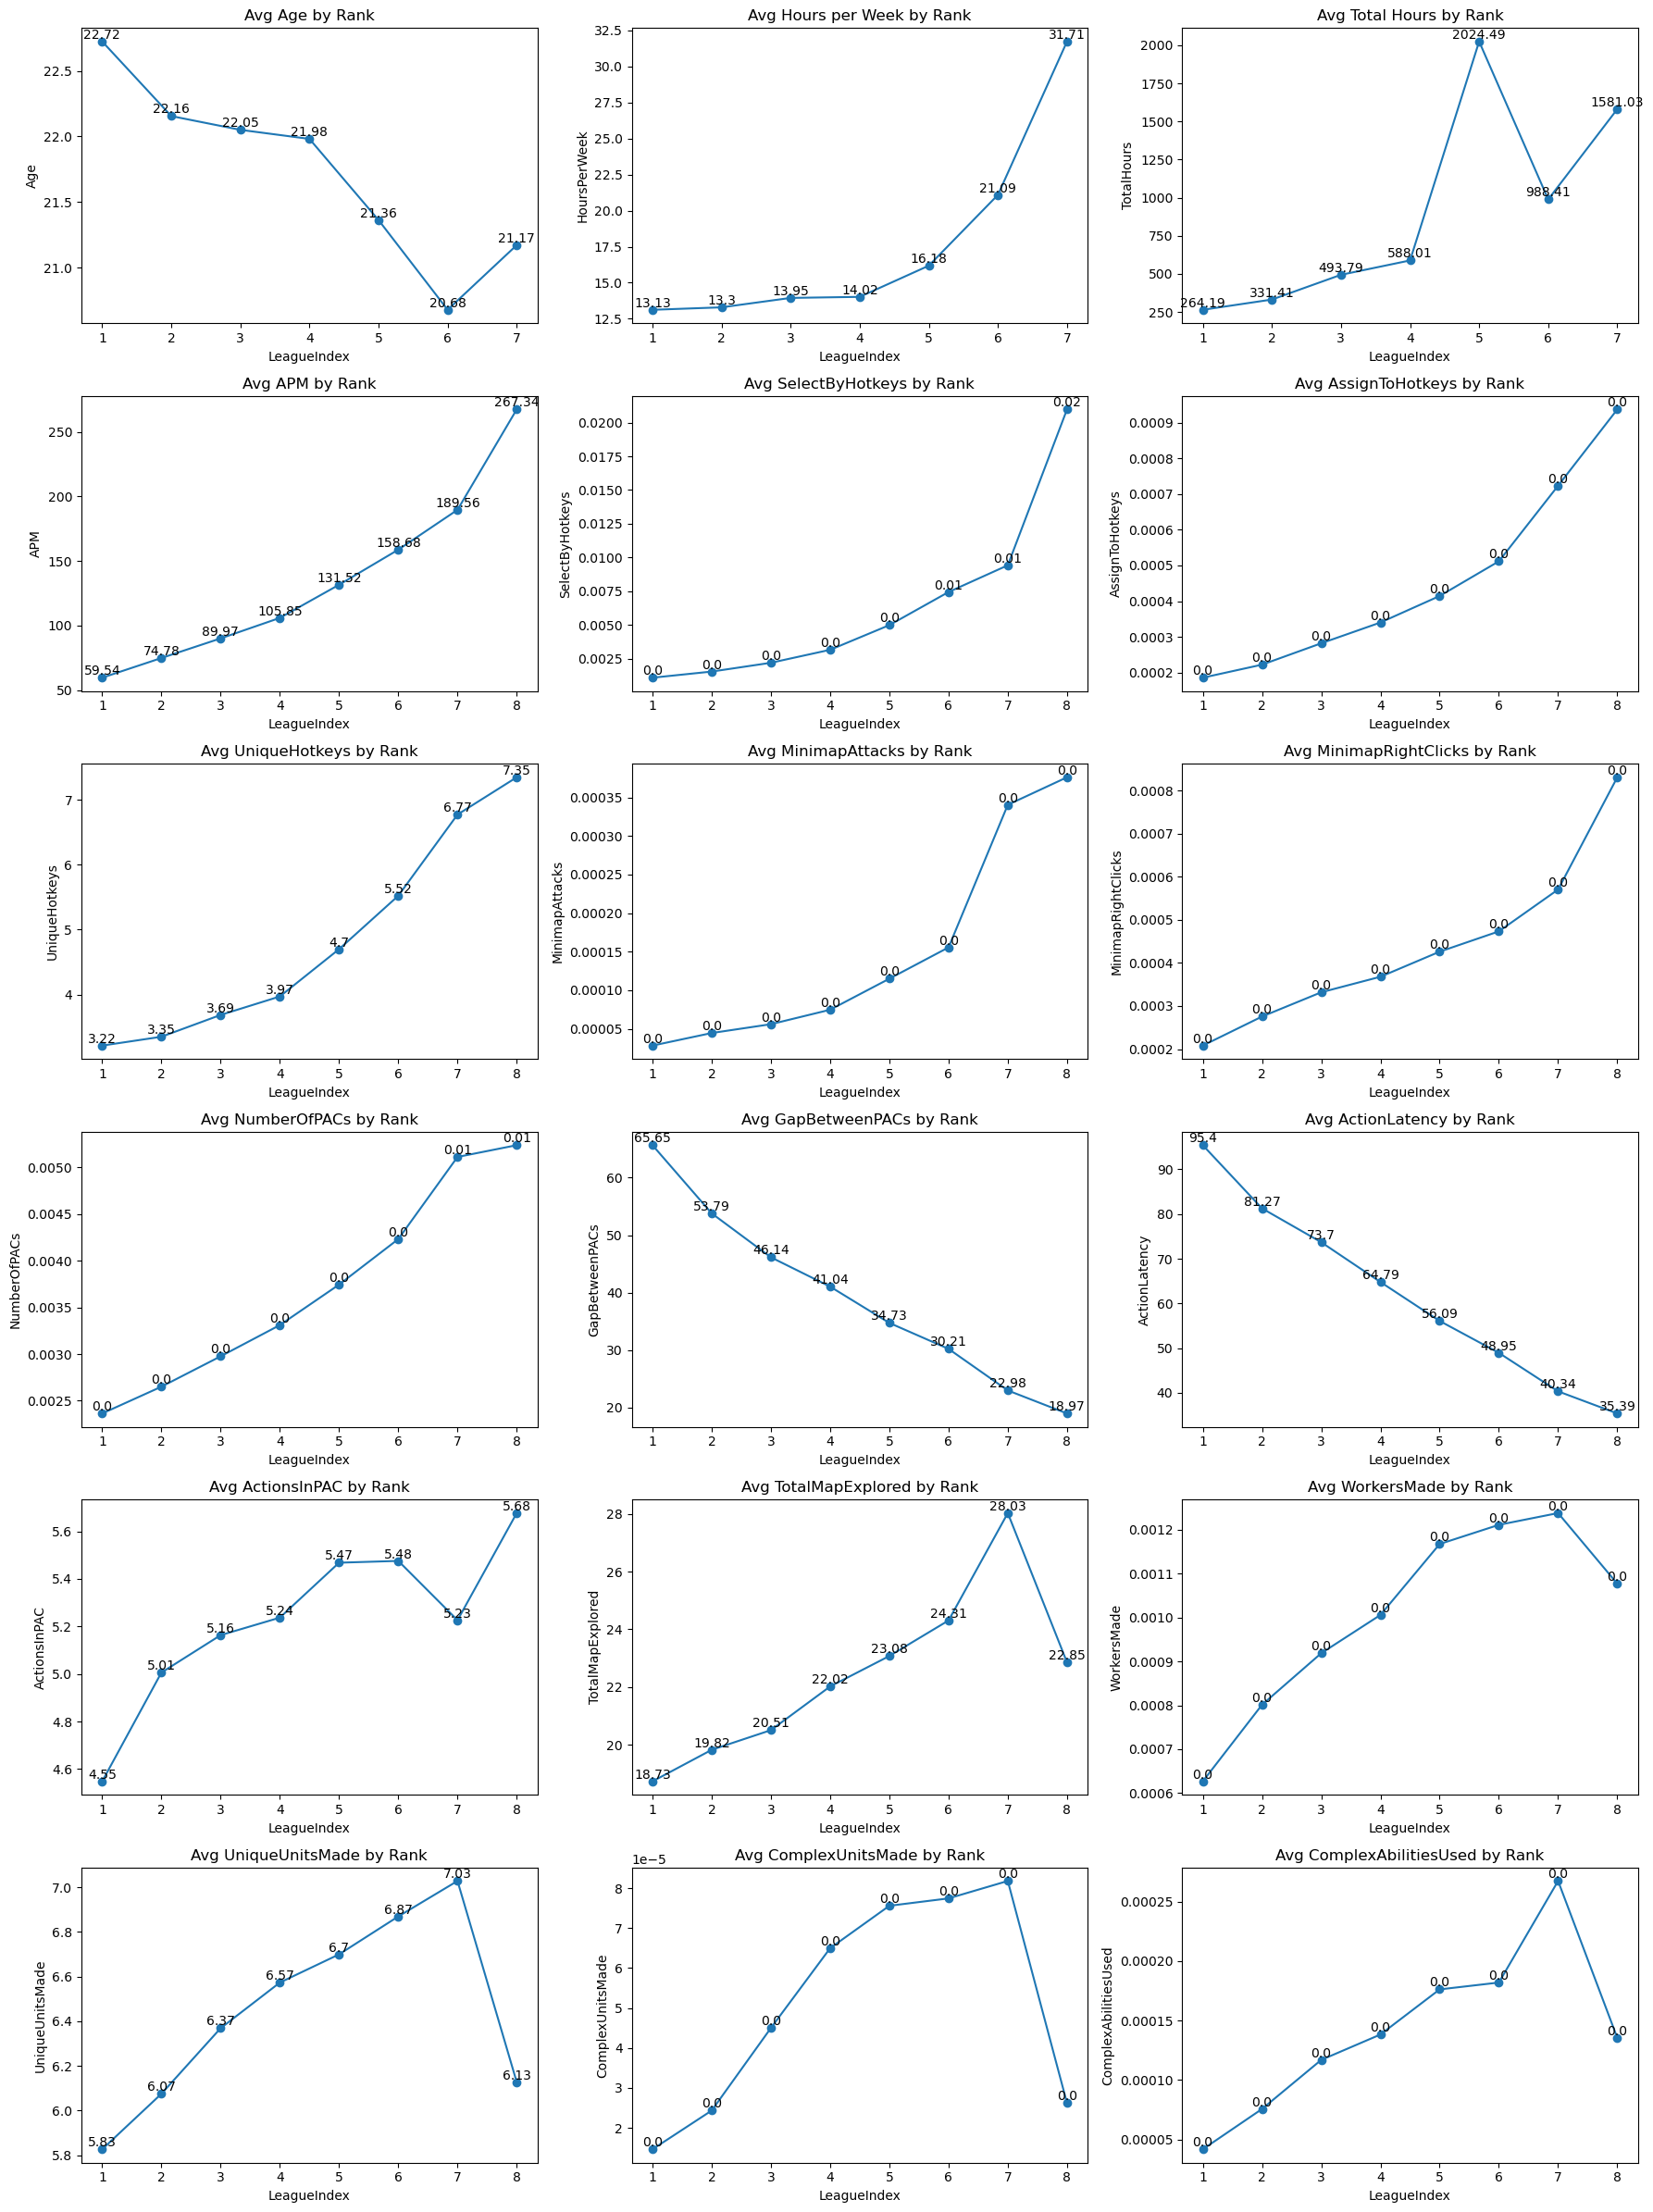

In [21]:
plot_average_by_rank(df, 'LeagueIndex', feature_names_plt,
                     ['Avg Age by Rank', 'Avg Hours per Week by Rank', 'Avg Total Hours by Rank', 'Avg APM by Rank', 'Avg SelectByHotkeys by Rank', 'Avg AssignToHotkeys by Rank', 'Avg UniqueHotkeys by Rank', 'Avg MinimapAttacks by Rank', 'Avg MinimapRightClicks by Rank', 'Avg NumberOfPACs by Rank', 'Avg GapBetweenPACs by Rank', 'Avg ActionLatency by Rank', 'Avg ActionsInPAC by Rank', 'Avg TotalMapExplored by Rank', 'Avg WorkersMade by Rank', 'Avg UniqueUnitsMade by Rank', 'Avg ComplexUnitsMade by Rank', 'Avg ComplexAbilitiesUsed by Rank'])

### Interpretation

#### We can see that Age for every Rank is between 21 to 23
#### Total No. of Hours showed sudden increase Rank 5 and again decrease further for Rank 6 and 7
#### APM, SelectByHotKeys, AssignToHotKeys, UniqueHotKeys, MiniMapRightClicks, NumberofPACs and ActioninPACs showing a monotonic increase as Rank goes up to 8
#### On the otherhand GapBetweenPACs, and ActionLatency showed a monotonic decrease which seems logical 
#### TotalMapExplored, WorkersMade, UniqueUnitsMade, ComplexUnitsMade and ComplexAbilitesUsed Show a monotonic increase till Rank 7 and after got dropped for Rank 8

## Filling NA with Median, Train Test Split, Data Preparation

In [22]:
def filling_NA(X_train, X_test, col):
    for c in col:
        X_train[c] = X_train[c].fillna(X_train[c].median())
        X_test[c] = X_test[c].fillna(X_test[c].median())
    return X_train, X_test

In [23]:
def data_preparation(dataframe):
    scaler = StandardScaler()
    encoder = OrdinalEncoder()
    X = dataframe.drop(['LeagueIndex', 'GameID'], axis=1)
    y = dataframe['LeagueIndex']
    col = ['Age', 'HoursPerWeek', 'TotalHours']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_test = filling_NA(X_train, X_test, col)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    y_train_encoded = encoder.fit_transform(np.array(y_train).reshape(-1, 1)).ravel()
    return X_train_scaled, X_test_scaled, y_train, y_test, y_train_encoded

## Model Building  and Evaluation

### List of Models Implemented
#### Using Statsmodels (mord package)
    Threshold-based models
        1. LogisticIT (Logistic Interpolated Threshold)
        2. LogisticAT (Logistic Adaptive Threshold)
    Regression Based Model
        3. OrdinalRidge (ordinal ridge regression)
        4. LAD (Least Absolute Deviation)
#### Using Skitlearn Package
    Classification based Model
        5. MulticlassLogistic
    6. SVM Ordinal Regressor OneVsRestClassifier
    Tree Based Models
    (Encoded the ordinal target variable to integer labels)
        7. Random Forest Ordinal Regression
        8. Gradiant Boosting Ordinal Regression
        9. XGBoost

In [24]:
def fit_and_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, y_train_encoded):
    
    # Convert the training data and testing data into DMatrix format
    encoder = OrdinalEncoder()
    dtrain = xgb.DMatrix(X_train_scaled, label=y_train_encoded)
    dtest = xgb.DMatrix(X_test_scaled)
    n_classes = pd.Series(y_train_encoded).nunique()

    # Define the parameters for XGBoost
    params = {
        'seed': 42,
        'objective': 'multi:softmax',  # Objective for ordinal regression
        'num_class': n_classes,  # Number of ordinal classes
        'eval_metric': 'mlogloss'  # Evaluation metric
    }
    models = {
        'LogisticIT': LogisticIT(),
        'LogisticAT': LogisticAT(),
        'OrdinalRidge': OrdinalRidge(random_state=42),
        'LAD': LAD(random_state=42),
        'MulticlassLogistic': LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42),
        'SVM Ordinal Regressor': OneVsRestClassifier(SVC(probability=True, random_state=42)),
        'Random Forest Ordinal Regression': RandomForestClassifier(random_state=42),
        'Gradiant Boosting Ordinal Regression': GradientBoostingClassifier(random_state=42),
        'XGBoost': xgb.train(params, dtrain),
    }
    results = {}
    encoder.fit(np.array(y_train).reshape(-1, 1))
    for model_name, model in models.items():
        if model_name == 'Random Forest Ordinal Regression':
            model.fit(X_train_scaled, y_train_encoded)
            predictions = model.predict(X_test_scaled)
            y_pred = encoder.inverse_transform(predictions.reshape(-1, 1))
        elif model_name == 'Gradiant Boosting Ordinal Regression':
            model.fit(X_train_scaled, y_train_encoded)
            predictions = model.predict(X_test_scaled)
            y_pred = encoder.inverse_transform(predictions.reshape(-1, 1))
        elif model_name == 'XGBoost':
            predictions_xgb = model.predict(dtest)
            y_pred = encoder.inverse_transform(predictions_xgb.reshape(-1, 1))
        else:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Store results
        results[model_name] = {'Accuracy': accuracy, 'MAE': mae}
    
    result_df = pd.DataFrame(results)
    
    return result_df


## Assessment Workflow (Main Function)

In [26]:
def project_workflow(dataframe):
    X_train_scaled, X_test_scaled, y_train, y_test, y_train_encoded = data_preparation(dataframe)
    result = fit_and_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, y_train_encoded)
    return result

In [27]:
project_workflow(df)

,LogisticIT,LogisticAT,OrdinalRidge,LAD,MulticlassLogistic,SVM Ordinal Regressor,Random Forest Ordinal Regression,Gradiant Boosting Ordinal Regression,XGBoost
Accuracy,0.388807,0.377025,0.384389,0.375552,0.360825,0.384389,0.421208,0.402062,0.360825
MAE,0.783505,0.765832,0.749632,0.761414,0.832106,0.874816,0.715758,0.762887,0.818851


#### when dealing with ordinal regression, it's important to consider the nature of the problem. Ordinal regression involves predicting ordered categories or rankings, rather than exact values. As a result, achieving high accuracy scores may not always be the most informative or meaningful evaluation metric.

### Interpretation

### When comparing the models based on these metrics, it appears that the Random Forest Ordinal Regression  model have the highest accuracy (0.421208) and the lowest MAE (0.715758). model seem to perform relatively well compared to the others. Therefore, either the Random Forest Ordinal Regression  model could be a good choice for your ordinal target variable. You may want to consider additional factors, such as interpretability, computational efficiency, and the specific requirements of your problem, to make a final decision.

## Among All Random Forest have High Accuracy same time less MAE

### Why considering MAE over accuracy (for non technical stakeholders) ?

When evaluating the performance of an ordinal regression model, it is important to choose an appropriate evaluation metric that captures the nature of the problem. While accuracy is commonly used, it may not be the best metric for ordinal regression as it focuses on exact category matches rather than the order of categories.

In contrast, Mean Absolute Error (MAE) is a suitable metric for ordinal regression. MAE measures the average absolute difference between the predicted and true ordinal values, providing insights into how well the model predicts the ranking or order of the categories. A lower MAE indicates better performance, with predictions closer to the true rankings.

Using MAE over accuracy allows stakeholders to understand the model's accuracy in capturing the overall ordering of the categories, rather than exact matches. It provides a more meaningful measure of performance, particularly when the specific values of the ordinal categories are less important than their relative positions or ranks.

By considering MAE as an evaluation metric, stakeholders can assess the model's ability to predict the correct order and make informed decisions based on the model's performance in capturing the relative rankings of the categories.

## Random Forest Feature Importance

In [28]:
X_train_scaled, X_test_scaled, y_train, y_test, y_train_encoded = data_preparation(df)
# Random Forest Ordinal Regression
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train_encoded)
# Gradient Boosting Ordinal Regression
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train_encoded)

GradientBoostingClassifier()

In [29]:
feature_names = df.columns.tolist()
# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature importance rankings
for i, feature_index in enumerate(indices):
    print(f"{i + 1}. '{feature_names[feature_index]}' {importances[feature_index]}")

1. 'NumberOfPACs' 0.09570940873120923
2. 'HoursPerWeek' 0.08506854169670786
3. 'Age' 0.07317586835574219
4. 'MinimapAttacks' 0.07280218384843858
5. 'TotalHours' 0.07162499275719458
6. 'MinimapRightClicks' 0.06835199018708073
7. 'APM' 0.06651210998285546
8. 'ActionsInPAC' 0.060698530050698064
9. 'GapBetweenPACs' 0.053896153796821444
10. 'AssignToHotkeys' 0.05351290430231791
11. 'UniqueHotkeys' 0.05285390002741595
12. 'ActionLatency' 0.04439165775456509
13. 'LeagueIndex' 0.04287984850222753
14. 'GameID' 0.040436232775017025
15. 'UniqueUnitsMade' 0.03471458168578694
16. 'SelectByHotkeys' 0.03390288915139176
17. 'TotalMapExplored' 0.02893051302309887
18. 'WorkersMade' 0.020537693371431014


## Gradiant Boosting Feature Inportance

In [30]:
# Get feature importances
importances = gb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature importance rankings
for i, feature_index in enumerate(indices):
    print(f"{i + 1}. '{feature_names[feature_index]}' {importances[feature_index]}")

1. 'NumberOfPACs' 0.21801309032545085
2. 'HoursPerWeek' 0.11878528548052239
3. 'Age' 0.10904484914486154
4. 'MinimapRightClicks' 0.06818830835662801
5. 'MinimapAttacks' 0.062423407488131466
6. 'TotalHours' 0.05865709573364413
7. 'APM' 0.05577464007462474
8. 'AssignToHotkeys' 0.054798825869963
9. 'ActionsInPAC' 0.04940069697150723
10. 'GapBetweenPACs' 0.03323050972518822
11. 'LeagueIndex' 0.028034120548066744
12. 'UniqueHotkeys' 0.02545818323658652
13. 'ActionLatency' 0.024881900536568656
14. 'UniqueUnitsMade' 0.02387301230479431
15. 'GameID' 0.023271614467243414
16. 'SelectByHotkeys' 0.019774724920911424
17. 'WorkersMade' 0.01767565522625275
18. 'TotalMapExplored' 0.00871407958905451


### Interpetation

#### 1. 'NumberOfPACs'    0.09570940873120923
#### 2. 'HoursPerWeek'     0.08506854169670786
#### 3. 'Age'     0.07317586835574219
#### 4. 'MinimapAttacks'    0.07280218384843858
#### 5. 'TotalHours'     0.07162499275719458
#### These are the top 5 Importance Feature as per Random Forest 

## Question
#### Hypothetical: after seeing your work, your stakeholders come to you and say that they can collect more data, but want your guidance before starting. How would you advise them based on your EDA and model results?

## Answer

#### According to the EDA preformed we can clearly see that Age, Hours Per Week and Total Hours these features are completety missing for a the highest Rank 8 that is Professional League, so i will request stakeholders to collect these data

#### All the ranks do not have comparible among of data points, the model will preform better if all ranks have enough data points Rank 7 and 8 are extremely low in number, so i will request stakeholders to collect more data